# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Разобъём всех людей на группы по количеству детей. Затем посчитаем количество должников в каждой группе методом sum() (в столбце 'debt' 1 соответствует наличию долга, 0 его отсутствию) и выведем результат на экран в виде таблицы, где в первой строке стоит количество детей, а во второй количество должников в этой категории:

In [22]:
children_debt_count = data.groupby('children')['debt'].sum()

df = pd.DataFrame(data=[list(children_debt_count)], columns=list(children_debt_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,0,1,2,3,4,5
Количество должников,1063,444,194,27,4,0


Посчитаем общее количество людей в каждой группе, и выведем результат на экран в виде таблицы:

In [23]:
children_count = data.groupby('children')['debt'].count()

df = pd.DataFrame(data=[list(children_count)], columns=list(children_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,0,1,2,3,4,5
Количество людей,14107,4809,2052,330,41,9


Исключим те группы, где количество людей нулевое (вдруг, в данные закралась ошибка, например, в гипотетической группе людей с 7 детьми может не оказаться ни одного человека) и выведем результат на экран:

(**всё это формальная проверка на тот случай, если для данной задачи будут меняться данные**)

In [24]:
children_count = children_count[children_count > 0]

В этой строке посчитаем отношение должников к общему числу людей в группах:

In [25]:
children_debt_percentage = children_debt_count / children_count 

Здесь результат, полученный в предыдущей строке, переведём в проценты и округлим до 1 знака после запятой, выведем результат на экран:

In [26]:
children_debt_percentage = (children_debt_percentage * 100).map('{:,.1f}'.format)

df = pd.DataFrame(data=[list(children_debt_percentage)], columns=list(children_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,0,1,2,3,4,5
Процент должников,7.5,9.2,9.5,8.2,9.8,0.0


Для наглядности представим результат в виде столбчатой диаграммы:

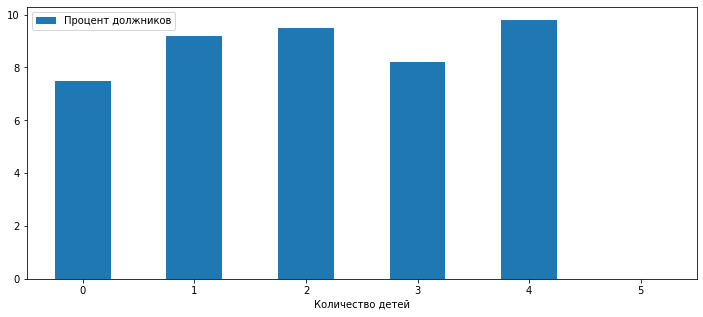

In [27]:
df = pd.DataFrame({'Количество детей': list(children_debt_percentage.index), 'Процент должников': list(children_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)
ax = df.plot.bar(x='Количество детей', y='Процент должников', rot=0, figsize=(12, 5))

**Вывод:** Существенных различий между количеством должников в каждой из групп нет. Нулевой показатель в группе, где 5 детей, может оказаться нерепрезентативным, так как там небольшое количество людей: всего 9. Наиболее низкие показатели в группах, где детей 0 или 3, их значения различаются всего лишь на 0.7%. Более высокие показатели (примерно на 2%) в группах, где 1, 2 и 4 детей.  
Показатели для групп с 0 и 3 детьми могут означать отсутствие существенного влияния количества детей на способность возвратить долг в срок. Также, выборка может оказаться не вполне репрезентативной (из-за неравномерного распределения количества людей в каждой группе), из-за чего мы и наблюдаем небольшое различие между средним количеством должников в группах с 0 и 3 детьми (7.85%) и средним количеством в группах с 1, 2 и 4 детьми (9.5%). Таким образом, выкинув потенциально нерепрезентативные выборки, сделаем вывод на основе выборок из людей с количеством детей от 0 до 2. **Итак, наше исследование показывает, что чем меньше детей в семье, тем эффективнее люди отдают долги

**Далее во всех задачах будем придерживаться той же схемы, что и в задаче выше, поэтому, будем опускать подробности**

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Количество должников в каждой группе:

In [28]:
family_debts_count = data.groupby('family_status')['debt'].sum().sort_values()

df = pd.DataFrame(data=[list(family_debts_count)], columns=list(family_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,вдовец / вдова,в разводе,Не женат / не замужем,гражданский брак,женат / замужем
Количество должников,63,84,273,385,927


Количество людей в каждой группе:

In [29]:
family_count = data.groupby('family_status')['family_status_id'].count().sort_values()

df = pd.DataFrame(data=[list(family_count)], columns=list(family_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,вдовец / вдова,в разводе,Не женат / не замужем,гражданский брак,женат / замужем
Количество людей,951,1189,2796,4146,12266


Исключение групп, где нет людей:

In [30]:
family_count = family_count[family_count > 0]

Процент должников среди всех людей в каждой группе:

In [31]:
family_debt_percentage = family_debts_count / family_count 
family_debt_percentage = (family_debt_percentage*100).map('{:,.1f}'.format).sort_values()

df = pd.DataFrame(data=[list(family_debt_percentage)], columns=list(family_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,вдовец / вдова,в разводе,женат / замужем,гражданский брак,Не женат / не замужем
Процент должников,6.6,7.1,7.6,9.3,9.8


Для наглядности представим результат в виде столбчатой диаграммы:

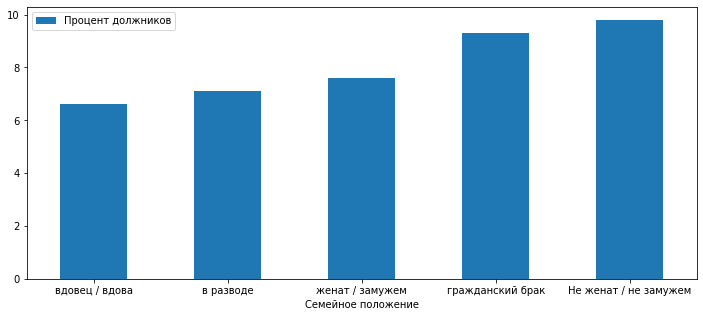

In [32]:
df = pd.DataFrame({'Семейное положение': list(family_debt_percentage.index), 'Процент должников': list(family_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)
ax = df.plot.bar(x='Семейное положение', y='Процент должников', rot=0, figsize=(12, 5))

***Вывод ниже написан в следующих  предположениях: разработчики курса под "гражданским браком" подразумевают сожительство, незарегистрированное официально; под статусом "женат/замужем" подразумевается официально зарегистрированный брак***
   
**Вывод**: Процент должников в каждой категории отличается не очень сильно: самый низкий показатель у вдовцов -- 6.6%. Самый высокий у несостоящих в браке -- 9.8%. Однако прослеживается чёткая тенденция повышения количества долгов в зависимости от семейного положения: чем более опытен человек в брачных/внебрачных отношениях, тем более эффективно он отдаёт долги. Под опытом подразумевается прохождение этапов от неформального сожительства до развода или потери супруга. **Похоже, что люди, связанные формальными семейными обязательствами, более ответственны.**

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Количество должников в каждой группе:

In [33]:
income_debts_count = data.groupby('total_income_category')['debt'].sum()

df = pd.DataFrame(data=[list(income_debts_count)], columns=list(income_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,A,B,C,D,E
Количество должников,2,354,1353,21,2


Количество людей в каждой группе:

In [34]:
income_count = data.groupby('total_income_category')['total_income'].count()

df = pd.DataFrame(data=[list(income_count)], columns=list(income_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,A,B,C,D,E
Количество людей,25,5014,15938,349,22


Исключение групп, где нет людей:

In [35]:
income_count = income_count[income_count > 0]

Процент должников среди всех людей в каждой группе:

In [43]:
income_debt_percentage = income_debts_count / income_count 
income_debt_percentage = (income_debt_percentage*100).map('{:,.1f}'.format)

df = pd.DataFrame(data=[list(income_debt_percentage)], columns=list(income_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,A,B,C,D,E
Процент должников,8.0,7.1,8.5,6.0,9.1


Для наглядности представим результат в виде столбчатой диаграммы:

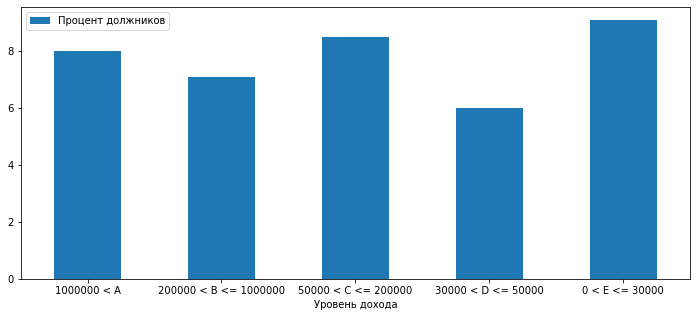

In [44]:
#print(list(income_debt_percentage.index))
index = list(income_debt_percentage.index)
for i in range(len(index)):
    if index[i] == 'A':
        index[i] = '1000000 < ' + 'A'
    if index[i] == 'B':
        index[i] = '200000 < ' + 'B' + ' <= 1000000'
    if index[i] == 'C':
        index[i] = '50000 < ' + 'C' + ' <= 200000'
    if index[i] == 'D':
        index[i] = '30000 < ' + 'D' + ' <= 50000'
    if index[i] == 'E':
        index[i] = '0 < ' + 'E' + ' <= 30000'
    
df = pd.DataFrame({'Уровень дохода': list(index), 'Процент должников': list(income_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)
ax = df.plot.bar(x='Уровень дохода', y='Процент должников', rot=0, figsize=(12, 5))

**Вывод:** Существенной разницы между процентными количествами должников в каждой группе нет. Также нет и прямой зависимости количества должников от уровня дохода: лучше всего возвращают долги люди из категории D с доходом ниже среднего, а люди из категории A со сверхдоходами отстают от D в скорости отдачи долгов на 2 позиции. Такой разброс выглядит подозрительно: есть предположение, что результаты, соответствующие маленьким по количеству людей выборкам не репрезентативны. Внесём коррективы: выкинем из рассмотрения категории A, D и E, где количество людей на порядки меньше, чем в категориях B и C (но это, кажется, и логично, судя по средней заработной плате в московском регионе).**Отсюда можно сделать вывод, что лучше отдают долги люди с более высоким уровнем дохода.**

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

Количество должников в каждой группе:

In [38]:
purpose_debts_count = data.groupby('purpose_category')['debt'].sum()

df = pd.DataFrame(data=[list(purpose_debts_count)], columns=list(purpose_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
Количество должников,400,780,369,183


Количество людей в каждой группе:

In [39]:
purpose_count = data.groupby('purpose_category')['purpose'].count()

df = pd.DataFrame(data=[list(purpose_count)], columns=list(purpose_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
Количество должников,4281,10754,3989,2324


Исключение групп, где нет людей:

In [40]:
purpose_count = purpose_count[purpose_count > 0]

Процент должников среди всех людей в каждой группе:

In [41]:
purpose_debt_percentage = purpose_debts_count / purpose_count 
purpose_debt_percentage = (purpose_debt_percentage*100).map('{:,.1f}'.format).sort_values()

df = pd.DataFrame(data=[list(purpose_debt_percentage)], columns=list(purpose_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,операции с недвижимостью,проведение свадьбы,операции с автомобилем,получение образования
Процент должников,7.3,7.9,9.3,9.3


Для наглядности представим результат в виде столбчатой диаграммы:

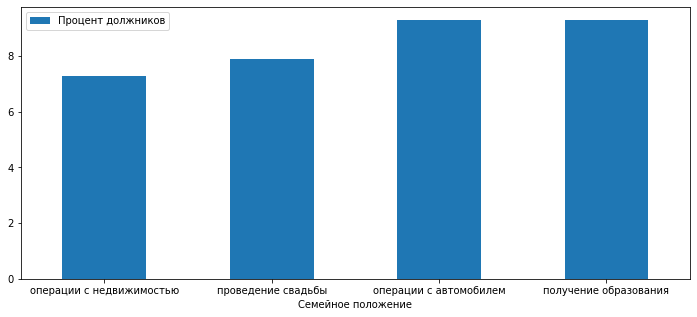

In [42]:
df = pd.DataFrame({'Семейное положение': list(purpose_debt_percentage.index), 'Процент должников': list(purpose_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)
ax = df.plot.bar(x='Семейное положение', y='Процент должников', rot=0, figsize=(12, 5))

**Вывод:** Охотнее всего возвращаются долги, связанные с операциями с недвижимостью (там 7.3% должников); чуть хуже обстоит дело с долгами на проведением свадьбы (там 7.9% должников). Хуже обстоят дела с займами на операции с автомобилями и на получение образования (в обеих категориях процент должников -- 9.3).

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* 

*Отступление:* То, что одновременно в двух столбцах `days_employed` и `total_income` насчитывается ровно 2174 пропуска, выглядит подозрительно. Было бы странно, чтобы каждый человек, не указавший суммарное количество рабочих дней, решил ещё и не указывать свой доход; также маловероятно, что одинаковое число пропусков сформировалось из тех, кто сделал пропуски только в одной графе. Поэтому, здесь, скорее всего, имеет место быть намеренное искажение данных разработчиками курса для непонятно каких учебных целей, ведь в жизни такое навряд ли встретится.

Возможные причины пропусков:

1) Причиной пропусков сразу в двух столбцах может быть техническая ошибка. И вообще, именно в этих двух столбцах тип ячеек `float`, а количество дней в найме бывает только целым; и суммарный доход обычно является целым числом. Стало быть, система могла дать сбой на какой-то определённой группе людей, непонятно по какому критерию.

2) Ещё одной причиной пропусков мог стать некорректный ввод данных. Пропуски могли возникнуть из-за ошибочной обработки введённых клиентом данных системой, например, он хотел указать, что его доход равен 200000, и решил записать это так: 200'000 система не сможет это считать как число.        

3) Причиной пропусков данных в столбце `total_income` могло стать нежелание клиента раскрывать информацию о своих доходах (возможно, он уклоняется от налогов). Причиной появления пропусков в столбце `days_employed` также могло стать нежелание раскрывать информацию: так, например, число дней в найме могло не согласовываться с суммарным доходом и статусом сотрудника (могли иметь место нелегальные источники дохода).

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Заполнение пропусков средним значением может привести к искажению данных, так как среди всех, допустим, 100000 переменных может найтись одна такая, которая резко отличается от всех остальных в одну или другую сторону; эта переменная сильно повлияет на значение для среднего. Медиана же делит отсортированную выборку на две примерно равных по объёму части, такая оценка исключает влияние аномальных элементов выборки, которые будут находиться в конце или начале.

## Общий вывод.

**Вывод:** Во всех случаях число должников в данной группе составляло от 6% до 10% от общего числа людей в данной группе. Разность процентных значений в группах данного разбиения не превосходила 3%. Неожиданные промежуточные значения в результатах исследований можно обьяснить небольшим количеством людей в некоторых выборках, из-за чего они могли стать нерепрезентативными (так, например, вычисления при изучении связи между уровнем дохода и возвратом кредита в срок показали, что более состоятельные клиенты подходят к выплатам кредитов менее ответственно, чем клиенты со средним доходом, число клиентов в каждой группе различается на порядок). 
    
*Небольшое резюме по каждому мини-исследованию:*
    
В первом эксперименте с разбиением людей на группы по количеству детей оказалось, что лучше всего отдают долги бездетные. Во втором эксперименте с разбиением людей на группы по семейному положению лучше всех отдают долги вдовцы: в этой группе процент должников равен 6.6%, хуже всех -- люди, не состоящие в отношениях. В третьем эксперименте с разбиением людей на группы по уровню дохода наблюдается следующая тенденция: чем больше человек зарабатывает, тем лучше он отдаёт долги. В группировке по целям займа наименьший процент должников оказался в группе операций с недвижимостью -- 7.3%, наибольший процент равный 9.3 -- в группах с операциями с автомобилем и получением образования. 

**Наиболее сильная корреляция количества должников от изучаемого фактора оказалась в разбиение на группы по семейному положению. На втором месте по значимости можно оставить уровень дохода. На третьем -- количество детей. На четвёртом -- цель займа.**